In [98]:
import pandas as pd
import numpy as np

from util.base import Data
from util.id3 import Tree
from util.visualizerID3 import TreeVisualizer

## <span style="color: blue"> **Einlesen, Analysieren und Vorverarbeiten der Daten** </span>

### DataFrame aus der csv-Datei einlesen

In [99]:
csvFile="data/Konsumkredit.csv"
df = pd.read_csv(csvFile)
df

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig
0,W,V,1,ungelernt,N,2514,N,N
1,M,V,0,ungelernt,N,2285,J,N
2,M,V,1,angelernt,N,3468,N,N
3,W,V,0,unbekannt,N,2172,N,N
4,M,W,1,Facharbeiter,J,2101,J,N
...,...,...,...,...,...,...,...,...
2419,M,V,1,unbekannt,N,3241,J,J
2420,W,V,1,Facharbeiter,N,3362,J,J
2421,M,V,1,Facharbeiter,N,3618,J,J
2422,W,V,2,Facharbeiter,N,3169,J,J


### Zielvariable festlegen

In [100]:
classLabel = 'kreditwuerdig'

### Diagramme für die Werte der Predictorvariable <span style="color: blue"> Beruf </span>

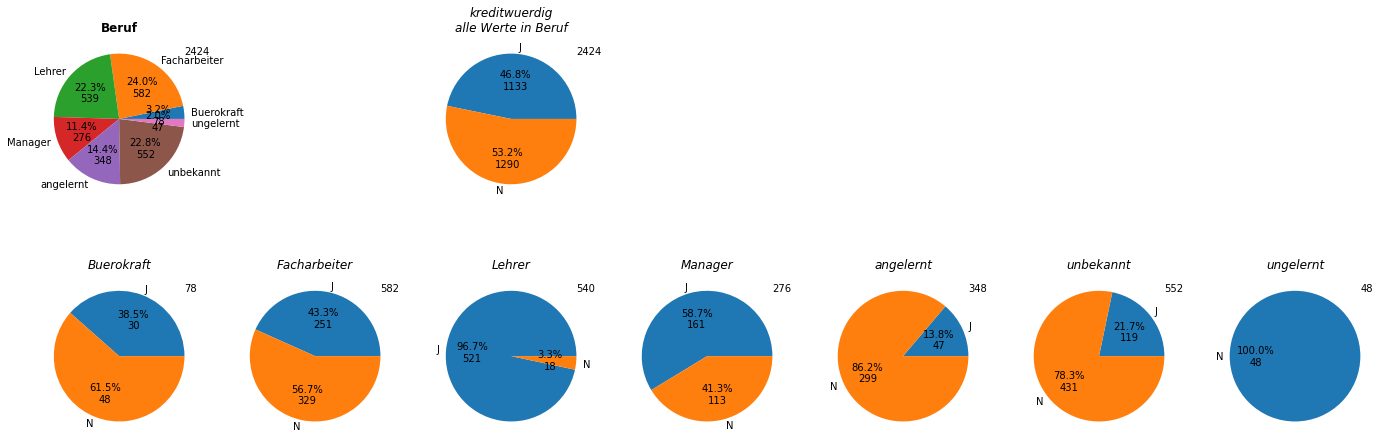

In [101]:
Data.showPieCharts(df=df, attribute='Beruf', classLabel=classLabel)

### Diagramme für die Werte der Predictorvariable <span style="color:blue"> Familienstand </span>

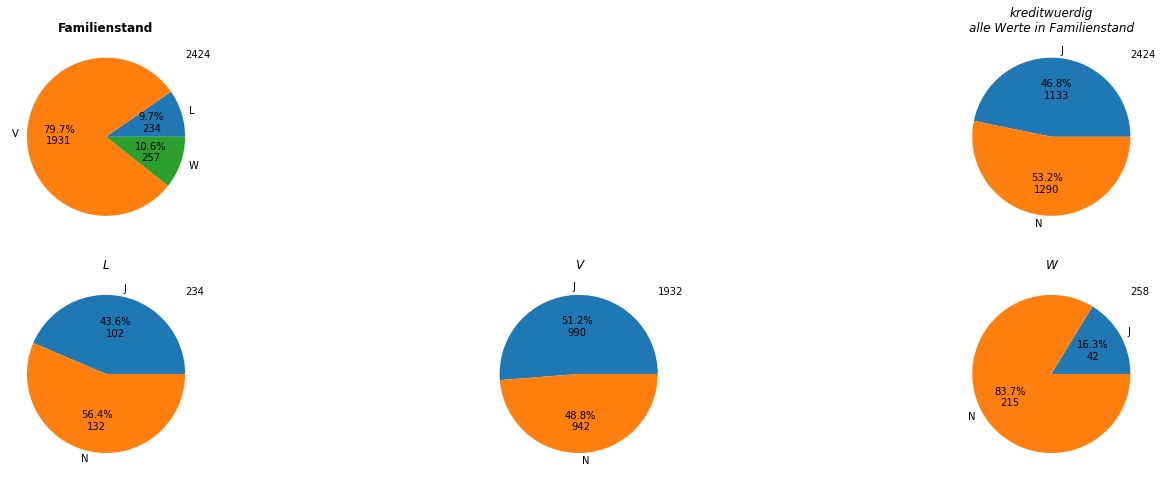

In [102]:
Data.showPieCharts(df=df, attribute='Familienstand', classLabel=classLabel)

### Überführen numerischer Werte in kategoriale Werte: <span style="color:blue"> Einkommen => Einkommensklasse </span> 

In [103]:
# numerische Werte in kategoriale überführen   
numAttribute = 'Einkommen'
conditionlist = [
    (df[numAttribute] <= 4000) ,
    (df[numAttribute] >  4000) & (df[numAttribute] <= 6000),
    (df[numAttribute] >  6000) & (df[numAttribute] <= 8000),
    (df[numAttribute] >  8000)]
choicelist = ['bis 4000', '4001 bis 6000', '6001 bis 8000', ' größer 8000']   
df['Einkommensklasse'] = np.select(conditionlist, choicelist, default='unbestimmt')
df

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig,Einkommensklasse
0,W,V,1,ungelernt,N,2514,N,N,bis 4000
1,M,V,0,ungelernt,N,2285,J,N,bis 4000
2,M,V,1,angelernt,N,3468,N,N,bis 4000
3,W,V,0,unbekannt,N,2172,N,N,bis 4000
4,M,W,1,Facharbeiter,J,2101,J,N,bis 4000
...,...,...,...,...,...,...,...,...,...
2419,M,V,1,unbekannt,N,3241,J,J,bis 4000
2420,W,V,1,Facharbeiter,N,3362,J,J,bis 4000
2421,M,V,1,Facharbeiter,N,3618,J,J,bis 4000
2422,W,V,2,Facharbeiter,N,3169,J,J,bis 4000


### Diagramme für die Werte der Predictorvariable <span style="color:blue"> Geschlecht </span>

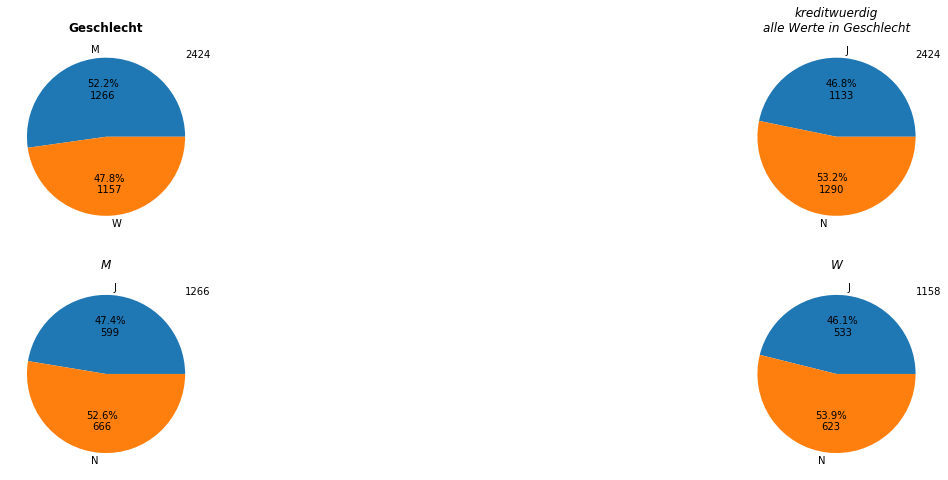

In [104]:
Data.showPieCharts(df=df, attribute='Geschlecht', classLabel=classLabel)

# <span style="color: blue"> **Initialisieren der Daten für die Modellerstellung** </span>

### Liste der Predictorvariablen festlegen


In [105]:
listOfAttributes = ['Geschlecht', 'Familienstand', 'Kinder', 'Beruf', 
'Wohneigentum', 'Ersparnisse', 'Einkommensklasse']

### Berechnung initialisieren und dabei Split in Trainungs-, Validierungs- und Testdatenmenge durchführen

In [106]:
data = Data(df = df)
data.initialize(listOfAttributes = listOfAttributes, classLabel = classLabel, trainProportion=0.7, valProportion=0.0)

### Trainingsdaten

In [107]:
# Testdaten
mask = df['_split'] == 'train'
df[mask]

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig,Einkommensklasse,_split
1,M,V,0,ungelernt,N,2285,J,N,bis 4000,train
4,M,W,1,Facharbeiter,J,2101,J,N,bis 4000,train
7,M,V,2,Facharbeiter,J,2538,J,N,bis 4000,train
8,W,W,0,Facharbeiter,N,2818,N,N,bis 4000,train
9,W,V,2,angelernt,N,2762,N,N,bis 4000,train
...,...,...,...,...,...,...,...,...,...,...
2417,M,V,1,Lehrer,N,3707,J,J,bis 4000,train
2418,M,W,1,angelernt,N,3696,J,J,bis 4000,train
2419,M,V,1,unbekannt,N,3241,J,J,bis 4000,train
2420,W,V,1,Facharbeiter,N,3362,J,J,bis 4000,train


### Testdaten

In [108]:
mask = df['_split'] == 'test'
df[mask]

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig,Einkommensklasse,_split
0,W,V,1,ungelernt,N,2514,N,N,bis 4000,test
2,M,V,1,angelernt,N,3468,N,N,bis 4000,test
3,W,V,0,unbekannt,N,2172,N,N,bis 4000,test
5,M,V,1,angelernt,J,2634,J,N,bis 4000,test
6,M,V,0,unbekannt,N,2402,J,N,bis 4000,test
...,...,...,...,...,...,...,...,...,...,...
2405,M,V,2,Lehrer,J,8236,J,J,größer 8000,test
2406,W,V,1,Lehrer,N,8860,J,J,größer 8000,test
2413,M,V,2,Manager,N,5196,J,J,4001 bis 6000,test
2421,M,V,1,Facharbeiter,N,3618,J,J,bis 4000,test


### Validierungsdaten

In [109]:
mask = df['_split'] == 'val'
df[mask]

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig,Einkommensklasse,_split


### Zusammenfassung des Split-Ergebnis

In [110]:
dfSplit = data.splitCheck()
dfSplit

,Anzahl Datensätze,Anteil an Gesamt,Anzahl 'N',Anteil 'N',Anzahl 'J',Anteil 'J'
Gesamt,2424,1.000000,1290,0.532178,1134,0.467822
Trainingsdaten,1695,0.699257,902,0.532153,793,0.467847
Validierungsdaten,0,0.000000,0,0.000000,0,0.000000
Testdaten,729,0.300743,388,0.532236,341,0.467764


# <span style="color: blue"> **Generieren des Entscheidungsbaums auf Basis der Trainingsdaten / maxLevel=3** </span>

In [111]:
id3Tree = Tree()
id3Tree.generateTree(data=data, minElements=1, maxLevel=3)

# <span style="color: blue"> **Anzeige des Entscheidungsbaums** </span>

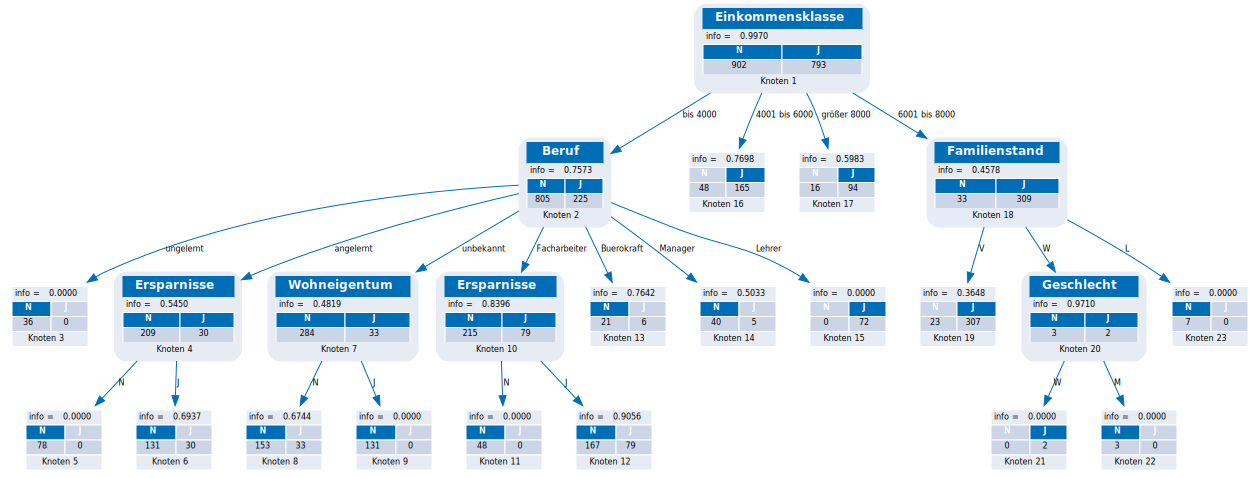

In [112]:
vs = TreeVisualizer()
dot = vs.DrawTree(tree = id3Tree)
dot

# <span style="color: blue"> **Anwenden der Entscheidungsbaums auf die Testdaten** </span>

In [113]:
mask = id3Tree.Data.Df['_split'] == 'test'
dataFrameOfResult = id3Tree.applyTree(df[mask]) 
dataFrameOfResult

,Modell,Real
0,N,N
2,N,N
3,N,N
5,N,N
6,N,N
...,...,...
2405,J,J
2406,J,J
2413,J,J
2421,N,J


### Ausgabe des Tests als Kreuztabelle

In [114]:
crossTable = pd.crosstab(dataFrameOfResult['Modell'],
                             dataFrameOfResult['Real'],
                             margins= True, margins_name='Summe')    
crossTable

Real,J,N,Summe
Modell,,,
J,265,45,310
N,76,343,419
Summe,341,388,729


# <span style="color: blue"> **Entscheidungsbaum mit minElements = 10** </span>

### Generieren des Entscheidungsbaums

In [115]:
id3Tree = Tree()
id3Tree.generateTree(data=data, minElements=10)

### Anzeige des Entscheidungsbaums

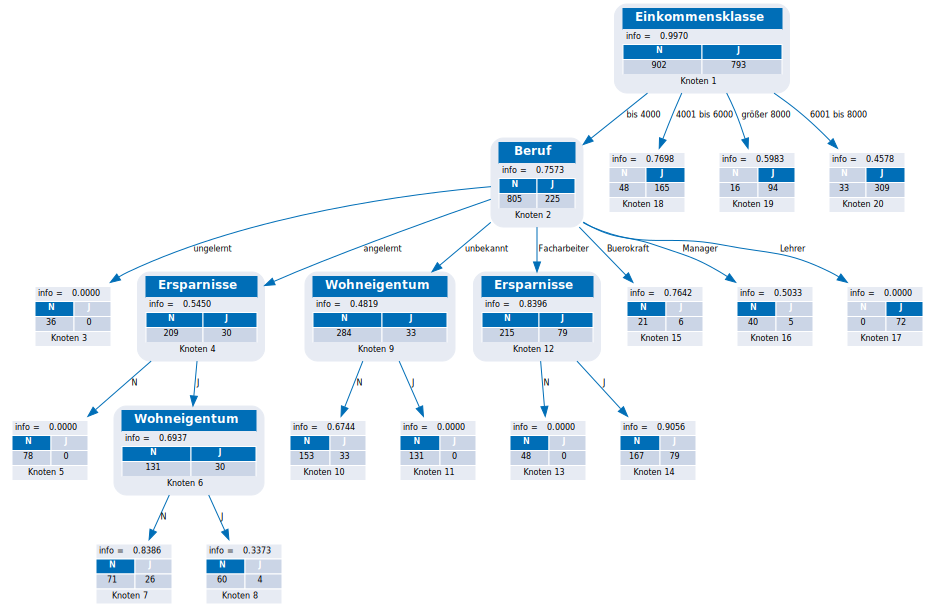

In [116]:
vs = TreeVisualizer()
dot = vs.DrawTree(tree = id3Tree)
dot

### Anwenden der Entscheidungsbaums auf die Testdaten

In [117]:
mask = id3Tree.Data.Df['_split'] == 'test'
dataFrameOfResult = id3Tree.applyTree(df[mask]) 
dataFrameOfResult

,Modell,Real
0,N,N
2,N,N
3,N,N
5,N,N
6,N,N
...,...,...
2405,J,J
2406,J,J
2413,J,J
2421,N,J


### Ausgabe des Tests als Kreuztabelle

In [118]:
crossTable = pd.crosstab(dataFrameOfResult['Modell'],
                             dataFrameOfResult['Real'],
                             margins= True, margins_name='Summe')    
crossTable

Real,J,N,Summe
Modell,,,
J,266,53,319
N,75,335,410
Summe,341,388,729
